<a href="https://colab.research.google.com/github/balaghband/Continuous-and-Hybrid-Systems-with-Nonlinear-Dynamics-Simulations/blob/main/Robertson_Benchmark_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Academic Honesty: All the code below is written only by me and no AI tool was used and no code was copied from anywhere

# Robertson Benchmark Simulation

We use solve ivp from scipy.integrate library for solving nonlinear continuous systems so, we import this library in addition to other necessary libraries.

In [1]:
from scipy.optimize import fsolve
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
import math
from scipy.integrate import odeint

$$
\begin{aligned}
    \dot{x} &= -\alpha x + \beta yz \\
    \dot{z} &= \gamma y^2 \\
    \dot{y} &= \alpha x - \beta yz - \gamma y^2
\end{aligned}
$$

 In this model, x, y, and z are positive values of a chemical reaction concentration. In
 this model, the assumption is that the sum of all these values is 1. α is a small constant
 with a value of 0.4 but, β and γ take large values. In this simulation, we used β as 102
 and gamma as 103.

In [2]:
alpha = 0.4
beta = 10e2
gamma = 10e3
def robertson_benchmark(t,state):

    x,y,z = state
    x_dot = (-alpha * x) + (beta * y * z)
    y_dot = (alpha * x) - (beta * y*z) - (gamma * (y**2))
    z_dot = gamma * (y**2)
    return [x_dot,y_dot,z_dot]

def sum_to_one(num_set,num_items):
    initial_random_set = []
    for i in range(num_set):
        value = np.random.rand(num_items)
        value /= value.sum()
        initial_random_set.append(value)
    return initial_random_set



This figure shows the change of x value over time with 30 random initial
 conditions. Most x values don’t change over time and some x with high initial values
 decrease over time. As the initial value of x is increasing, the value of x is decreasing
 more over time. For plotting this figure, as explained in part 2 of this document, we used
 the time of the model [0,20] and the first item in the output set ˙ x. All 30 different initial
 conditions are applied and the method used for this solution is RK45.

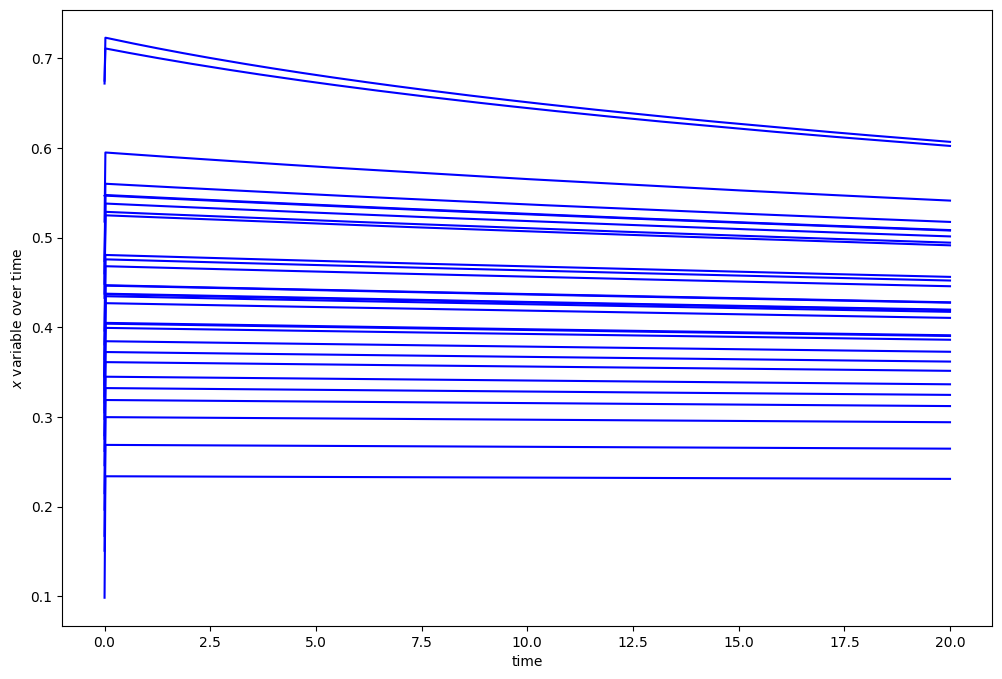

In [3]:
plt.figure(figsize=(12,8))
for i,initial_condition in enumerate(sum_to_one(30,3)):
    robertson_solution  = solve_ivp(robertson_benchmark,[0,20],initial_condition,method='RK45',t_eval=np.linspace(0,20,1000))
    plt.plot(robertson_solution.t, robertson_solution.y[0].T,color = 'blue')


plt.xlabel("time")
plt.ylabel("$x$ variable over time")
plt.show()

This code below shows the change of y value over time.

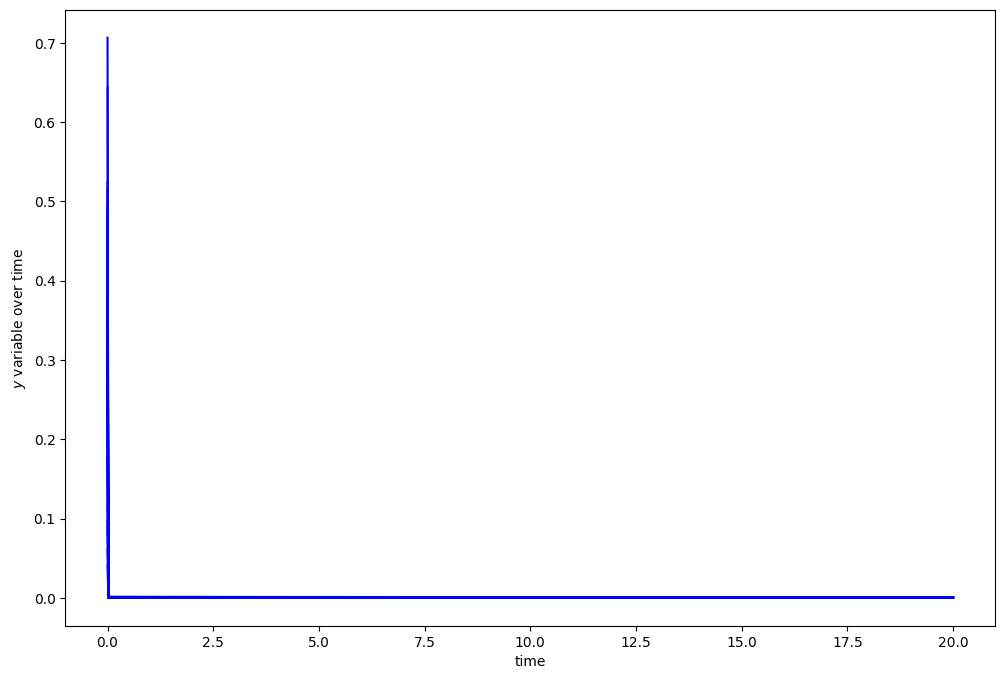

In [4]:
plt.figure(figsize=(12,8))
for i,initial_condition in enumerate(sum_to_one(30,3)):
    robertson_solution  = solve_ivp(robertson_benchmark,[0,20],initial_condition,method='RK45',t_eval=np.linspace(0,20,1000))
    plt.plot(robertson_solution.t, robertson_solution.y[1],color = 'blue')



plt.xlabel("time")
plt.ylabel("$y$ variable over time")
plt.show()

This code below shows the change of z value over time with 30 random initial
 conditions. As we see here, z values are constant for higher initial conditions, and for
 lower ones, they increase slightly over time. For plotting this figure, as explained in part
 2 of this document, we used the time of the model [0,20] and the third item in the output
 set ˙ z. All 30 different initial conditions are applied and the method used for this solution
 is RK45.

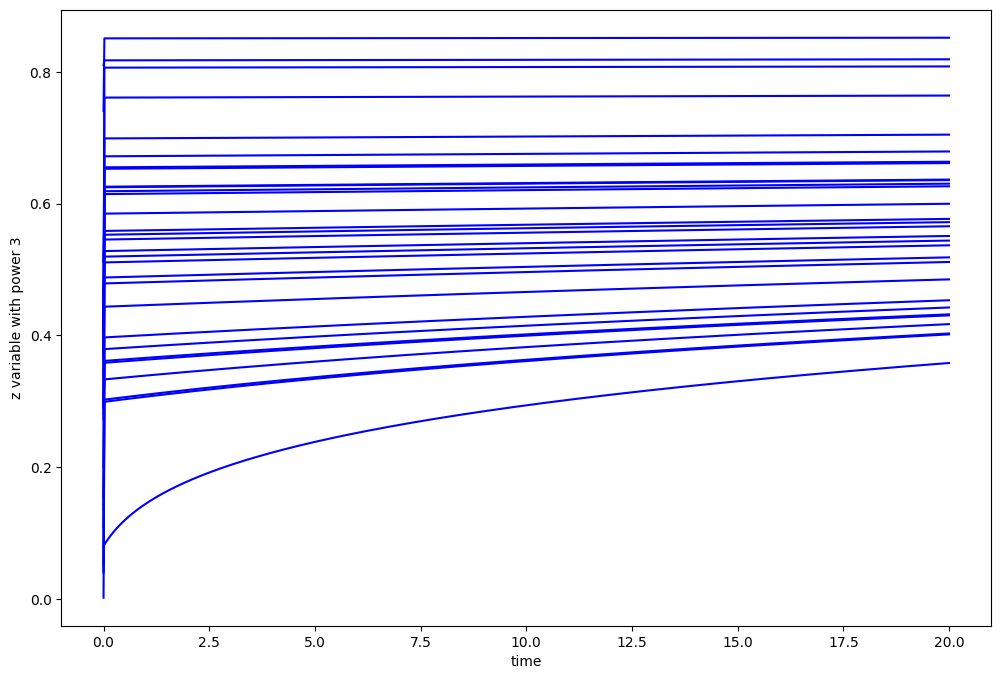

In [5]:
plt.figure(figsize=(12,8))
for i,initial_condition in enumerate(sum_to_one(30,3)):
    robertson_solution  = solve_ivp(robertson_benchmark,[0,20],initial_condition,method='RK45',t_eval=np.linspace(0,20,1000))
    plt.plot(robertson_solution.t, robertson_solution.y[2],color = 'blue')



plt.xlabel("time")
plt.ylabel("z variable with power 3")
plt.show()